In [1]:
import pandas as pd
import numpy as np
import random
import scipy.stats
import math
import seaborn as sns
from matplotlib import pyplot as plt
from random import sample
from scipy.stats import chisquare
from scipy.stats import geom
from scipy.stats import t
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline

CONFIDENCE INTERVAL
a) standard error = 0.0108, me = 0.0217, dof = 48, t_conf = 2.0106
b) we're 95% confident that the with each dollar increase in family_income, the university's gift aid is predicted to 
decrease on average by -0.0648 and -0.0214



C:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\patches.py:121: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


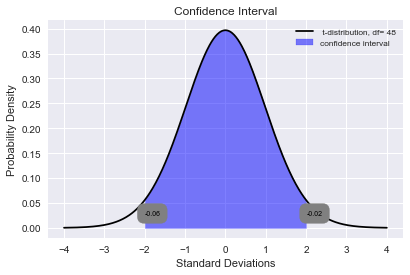

In [2]:
'''Compute the 95% confidence interval for the family income coecient using the regression output
from Table 8.21.'''

b0 = 24319.3
s_b0 = 1291.5
t_b0 = 18.83

b1 = -0.0431
s_b1 = .0108
t_b1 = -3.98

xbar = b1
se = s_b1
dof = 48
cl = .95
sl = 1-cl

# CONFIDENCE INTERVAL
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
s1t = sl / 2
t_conf = stats.t.ppf(1-s1t, dof) # upper tail is 1 - confidence level /2 (one tail)
se = s_b1
me = t_conf * se
lo = xbar - me
hi = xbar + me
print('''CONFIDENCE INTERVAL
a) standard error = {se:.4f}, me = {me:.4f}, dof = {dof}, t_conf = {t_conf:.4f}
b) we're {cl:.0%} confident that the with each dollar increase in family_income, the university's gift aid is predicted to 
decrease on average by {lo:.4f} and {hi:.4f}
'''
.format(cl=cl,se=se,me=me,lo=lo,hi=hi,dof=dof,t_conf=t_conf))

ax_conf = fig.add_subplot(1,2,2)
y = stats.t.pdf(x, dof)
two_t_conf = [t_conf, (t_conf)*-1]

ax_conf.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax_conf.fill_between(x, y, color='blue', alpha=0.5, where= ~((x<min(two_t_conf)) | (x>max(two_t_conf))) ,label="confidence interval")
ax_conf.set_ylabel('Probability Density')
ax_conf.set_xlabel('Standard Deviations')
ax_conf.set_title('Confidence Interval')
ax_conf.text(min(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_lo:.2f}'.format(t_lo=lo), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
ax_conf.text(max(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_hi:.2f}'.format(t_hi=hi), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
legend = ax_conf.legend(shadow=True,fontsize='small')

In [3]:
print('''Midterm elections and unemployment

assessing the validity of "the higher the unemployment rate the worse the president's party will do in midterm elections

when we fit a regression line, there's two estimates as b0 and b0, slope and intercept. because those are the estimates of the parameter, whether their values are valid for us, 
we might want to check if the true slope parameter is different than zero. (the classic hypothesis test approach) is this convincing evidence that the true linear model has a
negative slope. to assess the hypotheses, we identify a standard error for the estimate, compute an appropriate test statistic, and identify the p-value.

since the statistical softwares does not check whether the method is appropriate, we should still verify our conditionsare met for the test. ''')

Midterm elections and unemployment

assessing the validity of "the higher the unemployment rate the worse the president's party will do in midterm elections

when we fit a regression line, there's two estimates as b0 and b0, slope and intercept. because those are the estimates of the parameter, whether their values are valid for us, 
we might want to check if the true slope parameter is different than zero. (the classic hypothesis test approach) is this convincing evidence that the true linear model has a
negative slope. to assess the hypotheses, we identify a standard error for the estimate, compute an appropriate test statistic, and identify the p-value.

since the statistical softwares does not check whether the method is appropriate, we should still verify our conditionsare met for the test. 


In [4]:
'''8.31 Body measurements, Part IV. The scatterplot and least squares summary below show the relation-
ship between weight measured in kilograms and height measured in centimeters of 507 physically active
individuals.
(a) Describe the relationship between height and weight.
(b) Write the equation of the regression line. Interpret the slope and intercept in context.
(c) Do the data provide strong evidence that an increase in height is associated with an increase in weight?
State the null and alternative hypotheses, report the p-value, and state your conclusion.
(d) The correlation coefficient for height and weight is 0.72. Calculate R2 and interpret it in context.'''

print('''a) there's a positive, strong linear relationship between height and weight
b) regression line: weight = -105.0113 + 1.0176 * height
the interpretation of the intercept might sound bizarre. someone who have 0 centimeters of height (which is nonexistent :D)
is expected to weight -105.0113 grams.
slope: a person who has one more centimeter is expected to weight 1.0176 kg more.
c) H0: there's no association between height and weight. (the true slope for weight is 0)
HA: there's an association between height and weight. (the true slope for weight is different than 0)
because the p value of the coefficient is less than our significance level, we reject the null hypothesis and conclude
there's an association between height and weight variables.
d) R^2 = 0.5184. %51.84 of the variability in the height is explained by the height of individuals.''')

a) there's a positive, strong linear relationship between height and weight
b) regression line: weight = -105.0113 + 1.0176 * height
the interpretation of the intercept might sound bizarre. someone who have 0 centimeters of height (which is nonexistent :D)
is expected to weight -105.0113 grams.
slope: a person who has one more centimeter is expected to weight 1.0176 kg more.
c) H0: there's no association between height and weight. (the true slope for weight is 0)
HA: there's an association between height and weight. (the true slope for weight is different than 0)
because the p value of the coefficient is less than our significance level, we reject the null hypothesis and conclude
there's an association between height and weight variables.
d) R^2 = 0.5184. %51.84 of the variability in the height is explained by the height of individuals.


In [5]:
'''8.32 Beer and blood alcohol content. Many people believe that gender, weight, drinking habits, and many
other factors are much more important in predicting blood alcohol content (BAC) than simply considering
the number of drinks a person consumed. Here we examine data from sixteen student volunteers at Ohio
State University who each drank a randomly assigned number of cans of beer. These students were evenly
divided between men and women, and they differed in weight and drinking habits. Thirty minutes later, a
police officer measured their blood alcohol content (BAC) in grams of alcohol per deciliter of blood.19 The
scatterplot and regression table summarize the findings.
(a) Describe the relationship between the number of cans of beer and BAC.
(b) Write the equation of the regression line. Interpret the slope and intercept in context.
(c) Do the data provide strong evidence that drinking more cans of beer is associated with an increase in
blood alcohol? State the null and alternative hypotheses, report the p-value, and state your conclusion.
(d) The correlation coefficient for number of cans of beer and BAC is 0.89. Calculate R2 and interpret it in
context.
(e) Suppose we visit a bar, ask people how many drinks they have had, and also take their BAC. Do you
think the relationship between number of drinks and BAC would be as strong as the relationship found
in the Ohio State study?'''
print('''a) there's a strong positive linear relationship between cans of beer and BAC in blood.
b) regression line: BAC in blood = -0.0127 + 0.0180 * beers 
the interpretation of the intercept might sound bizarre. someone who have drank no cans of beer is expected to 
have -105.0113 grams/deciliters of BAC in the blood.
slope: drinking one more beer is expected increase the BAC in blood by 0.0180 grams/deciliters.
c) H0: there's no association between beers and BAC in blood. (the true slope of BAC is 0)
HA: there's an association between beers and BAC in blood. (the true slope of BAC is different than 0)
because the p value of the coefficient is less than our significance level, we reject the null hypothesis and conclude
there's an association between height and weight variables.
d) 79.21% of the variability in the BAC level in blood is explained by the amount of beer drank.
e) because this is a study, i think this would result better than the method explained in this question. also, the answers
retrieved from people would be biased. that would change the slope.''')

a) there's a strong positive linear relationship between cans of beer and BAC in blood.
b) regression line: BAC in blood = -0.0127 + 0.0180 * beers 
the interpretation of the intercept might sound bizarre. someone who have drank no cans of beer is expected to 
have -105.0113 grams/deciliters of BAC in the blood.
slope: drinking one more beer is expected increase the BAC in blood by 0.0180 grams/deciliters.
c) H0: there's no association between beers and BAC in blood. (the true slope of BAC is 0)
HA: there's an association between beers and BAC in blood. (the true slope of BAC is different than 0)
because the p value of the coefficient is less than our significance level, we reject the null hypothesis and conclude
there's an association between height and weight variables.
d) 79.21% of the variability in the BAC level in blood is explained by the amount of beer drank.
e) because this is a study, i think this would result better than the method explained in this question. also, the answe

In [13]:
'''8.33 Husbands and wives, Part II. The scatterplot below summarizes husbands' and wives' heights in a
random sample of 170 married couples in Britain, where both partners' ages are below 65 years. Summary
output of the least squares fit for predicting wife's height from husband's height is also provided in the table.
(a) Is there strong evidence that taller men marry taller women? State the hypotheses and include any
information used to conduct the test.
(b) Write the equation of the regression line for predicting wife's height from husband's height.
(c) Interpret the slope and intercept in the context of the application.
(d) Given that R2 = 0.09, what is the correlation of heights in this data set?
(e) You meet a married man from Britain who is 5'9" (69 inches). What would you predict his wife's height
to be? How reliable is this prediction?
(f) You meet another married man from Britain who is 6'7" (79 inches). Would it be wise to use the same
linear model to predict his wife's height? Why or why not?'''
print(f'''a) yes. since the p value of the slope coefficient of height_husband is too low, we can say the slope of
the true regression line is different than 0. taller men marry taller women.
b) height_wife = 43.5755 + 0.2863 * height_husband
c) slope: for each additional inches of a husband will, the average height of the wife is expected to be 0.2863 on average. 
intercept: a husband who is 0 inches tall (which is nonextistent :D) would have a wife who is 42.5755 inches.
d) {np.sqrt(0.09)} is the correlation.
e) regression line: 43.5755 + 0.2863 * height_husband >> put 69 inches for explanatory variable >> {43.5755 + 0.2863 * 69}
we would state that she's {43.5755 + 0.2863 * 69} inches long. However, this wouldn't be a reliable estimate because the
correlation is too low for those data.
f) wouldn't be wise. since 79 inches tall observation is too far away from the data's realm, this would require extrapolation.''')

a) yes. since the p value of the slope coefficient of height_husband is too low, we can say the slope of
the true regression line is different than 0. taller men marry taller women.
b) height_wife = 43.5755 + 0.2863 * height_husband
c) slope: for each additional inches of a husband will, the average height of the wife is expected to be 0.2863 on average. 
intercept: a husband who is 0 inches tall (which is nonextistent :D) would have a wife who is 42.5755 inches.
d) 0.3 is the correlation.
e) regression line: 43.5755 + 0.2863 * height_husband >> put 69 inches for explanatory variable >> 63.3302
we would state that she's 63.3302 inches long. However, this wouldn't be a reliable estimate because the
correlation is too low for those data.
f) wouldn't be wise. since 79 inches tall observation is too far away from the data's realm, this would require extrapolation.


In [19]:
'''8.34 Urban homeowners, Part II. Exercise 8.29 gives a scatterplot displaying the relationship between the
percent of families that own their home and the percent of the population living in urban areas. Below is a
similar scatterplot, excluding District of Columbia, as well as the residuals plot. There were 51 cases.
(a) For these data, R2 = 0.28. What is the
correlation? How can you tell if it is
positive or negative?
(b) Examine the residual plot. What do you
observe? Is a simple least squares fit
appropriate for these data?'''

print(f'''a) it's negative, can be seen in the scatter plot. line is going downwards. the correlation is {np.sqrt(.28):.2f}
b) we should check the conditions for least squares regression:
linearity. the data shows an almost linear trend. might fail.
nearly normal residuals. there are outliers in the data. some residuals are far away from the center of the data. fails.
constant variability. the residuals are bigger for bigger x. this condition fails
independent observations. the data does not include a sequence in collection. probably the observations are independent.''')

a) it's negative, can be seen in the scatter plot. line is going downwards. the correlation is 0.53
b) we should check the conditions for least squares regression:
linearity. the data shows an almost linear trend. might fail.
nearly normal residuals. there are outliers in the data. some residuals are far away from the center of the data. fails.
constant variability. the residuals are bigger for bigger x. this condition fails
independent observations. the data does not include a sequence in collection. probably the observations are independent.


a) hypotheses:
H0: the true slope coefficient between percent in poverty and annual murders per million is 0.
HA: the true slope coefficient between percent in poverty and annual murders per million is different than 0.
b) since the p value is lower than our significance level, we reject the null hypthesis and conclude
the data provide convincing evidence that the poverty percentage is a significant predictor of murder rate.
c) CONFIDENCE INTERVAL
standard error = 0.3900, me = 0.8163, dof = 20, t_conf = 2.0930
we're 95% confident that the with each percent increase in poverty the annual murders per million is predicted to
increase on average by 1.7427 and 3.3753 
d) yes, we decided the null hypothesis is rejected. since we can't see the 0 in our confidence interval, we can say it agrees 


C:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\patches.py:121: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


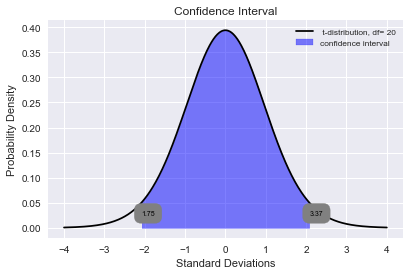

In [28]:
'''8.35 Murders and poverty, Part II. Exercise 8.25 presents regression output from a model for predicting
annual murders per million from percentage living in poverty based on a random sample of 20 metropolitan
areas. The model output is also provided below.
(a) What are the hypotheses for evaluating whether poverty percentage is a significant predictor of murder
rate?
(b) State the conclusion of the hypothesis test from part (a) in context of the data.
(c) Calculate a 95% confidence interval for the slope of poverty percentage, and interpret it in context of
the data.
(d) Do your results from the hypothesis test and the confidence interval agree? Explain.'''
b0 = -29.901
s_b0 = 7.789
t_b0 = -3.839

b1 = 2.559
s_b1 = .390
t_b1 = 6.562

xbar = b1
se = s_b1
dof = 20
cl = .95
sl = 1-cl
print(f'''a) hypotheses:
H0: the true slope coefficient between percent in poverty and annual murders per million is 0.
HA: the true slope coefficient between percent in poverty and annual murders per million is different than 0.
b) since the p value is lower than our significance level, we reject the null hypthesis and conclude
the data provide convincing evidence that the poverty percentage is a significant predictor of murder rate.
c) CONFIDENCE INTERVAL
standard error = {se:.4f}, me = {me:.4f}, dof = {dof}, t_conf = {t_conf:.4f}
we're {cl:.0%} confident that the with each percent increase in poverty the annual murders per million is predicted to
increase on average by {lo:.4f} and {hi:.4f} 
d) yes, we decided the null hypothesis is rejected. since we can't see the 0 in our confidence interval, we can say it agrees ''')
# CONFIDENCE INTERVAL
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
s1t = sl / 2
t_conf = stats.t.ppf(1-s1t, dof) # upper tail is 1 - confidence level /2 (one tail)
se = s_b1
me = t_conf * se
lo = xbar - me
hi = xbar + me
ax_conf = fig.add_subplot(1,2,2)
y = stats.t.pdf(x, dof)
two_t_conf = [t_conf, (t_conf)*-1]

ax_conf.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax_conf.fill_between(x, y, color='blue', alpha=0.5, where= ~((x<min(two_t_conf)) | (x>max(two_t_conf))) ,label="confidence interval")
ax_conf.set_ylabel('Probability Density')
ax_conf.set_xlabel('Standard Deviations')
ax_conf.set_title('Confidence Interval')
ax_conf.text(min(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_lo:.2f}'.format(t_lo=lo), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
ax_conf.text(max(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_hi:.2f}'.format(t_hi=hi), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
legend = ax_conf.legend(shadow=True,fontsize='small')

In [39]:
'''8.36 Babies. Is the gestational age (time between conception and birth) of a low birth-weight baby useful
in predicting head circumference at birth? Twenty-five low birth-weight babies were studied at a Harvard
teaching hospital; the investigators calculated the regression of head circumference (measured in centimeters)
against gestational age (measured in weeks). The estimated regression line is
head circdumference = 3.91 + 0.78 * gestational age
(a) What is the predicted head circumference for a baby whose gestational age is 28 weeks?
(b) The standard error for the coefficient of gestational age is 0. 35, which is associated with df = 23. Does
the model provide strong evidence that gestational age is significantly associated with head circumfer-
ence?'''
stats.t.cdf(x=-((0.78-0)/.35), df=23) * 2 # two tailed p-value of corresponding t-score

print(f'''a) {3.91+0.78*28} is the predicted head circumference for a baby
b) t-score: {(0.78-0)/ .35}
two tailed p-value of corresponding t-score: {stats.t.cdf(x=-((0.78-0)/.35), df=23) * 2:.4f}
the model provide strong evidence that the gestational age is significantly associated with head circumference.''')

a) 25.75 is the predicted head circumference for a baby
b) t-score: 2.2285714285714286
two tailed p-value of corresponding t-score: 0.0359
the model provide strong evidence that the gestational age is significantly associated with head circumference.
